<a href="https://colab.research.google.com/github/DevCielo/neural-networks-from-scratch/blob/main/Neural_Networks_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bulding CNN's with tensorflow and from scratch**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# LeNet-5 with tensorflow


In [2]:
def LeNet5():
  model = tf.keras.Sequential([
      # Convolution Layer
      tf.keras.layers.Conv2D(6, (5, 5), activation='tanh', strides=(1, 1), padding='valid', name='conv0'),
      # Average Pooling Layer
      tf.keras.layers.AveragePooling2D((2,2), strides=(2,2), name='avg_pool0'),
      # Convolution Layer
      tf.keras.layers.Conv2D(16, (5, 5), strides=(1,1), padding='valid', activation='tanh', name='conv1'),
      # Average Pooling Layer
      tf.keras.layers.AveragePooling2D((2,2), strides=(2,2), name='avg_pool1'),
      # Convolution Layer
      tf.keras.layers.Conv2D(120, (5, 5), strides=(1, 1), padding='valid', activation='tanh', name='conv2'),
      # Flatten the output
      tf.keras.layers.Flatten(),
      # Fully Connected Layer
      tf.keras.layers.Dense(84, activation='tanh', name='fc1'),
      tf.keras.layers.Dense(10, activation='softmax', name='output'),
  ])

  return model

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8528 - loss: 0.5322 - val_accuracy: 0.9705 - val_loss: 0.1085
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9639 - loss: 0.1178 - val_accuracy: 0.9777 - val_loss: 0.0751
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9780 - loss: 0.0725 - val_accuracy: 0.9815 - val_loss: 0.0641
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9852 - loss: 0.0492 - val_accuracy: 0.9827 - val_loss: 0.0581
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9874 - loss: 0.0402 - val_accuracy: 0.9828 - val_loss: 0.0578
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9892 - loss: 0.0346 - val_accuracy: 0.9838 - val_loss: 0.0564
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9924 - loss: 0.0242 - val_accuracy: 0.9857 - val_loss: 0.0531
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step 

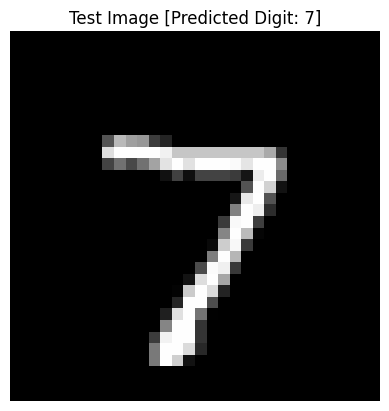

In [3]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to (32, 32, 1) to match the input shape of LeNet-5
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Zero-pad the images to 32x32
train_images = np.pad(train_images, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')
test_images = np.pad(test_images, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Create the model
model = LeNet5()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Make a prediction on the first test image
prediction = model.predict(test_images[0:1])
predicted_digit = np.argmax(prediction)
print(f"Predicted digit: {predicted_digit}")

# Show the test image
plt.imshow(test_images[0].squeeze(), cmap='gray')
plt.title(f"Test Image [Predicted Digit: {predicted_digit}]")
plt.axis('off')
plt.show()

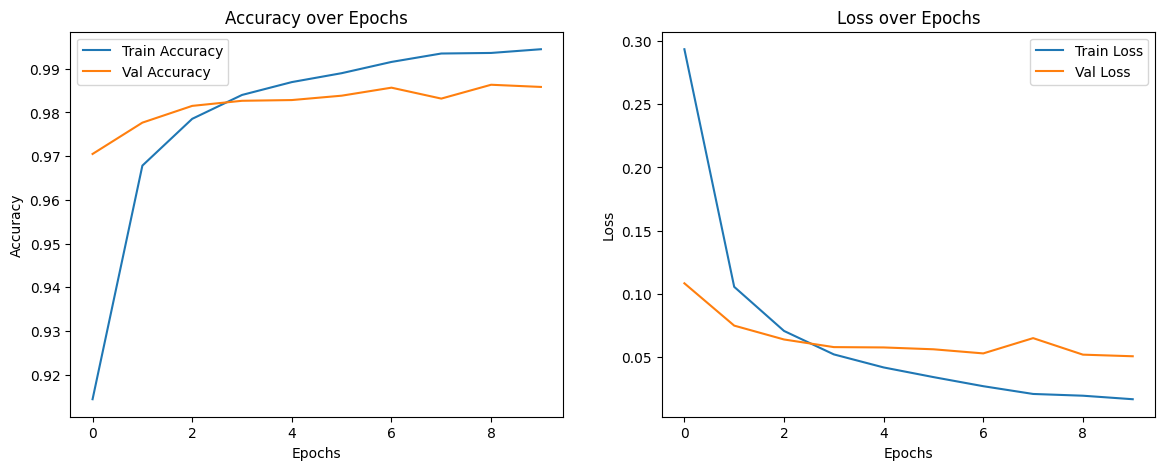

In [4]:
# Plot the training and validation accuracy and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
ax1.set_title('Accuracy over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot loss
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Val Loss')
ax2.set_title('Loss over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

# LeNet-5 from scratch

In [5]:
def conv2d(input, filters, bias, stride=1, padding=0):
    (n_f, f, f, n_c) = filters.shape
    (in_dim, in_dim, n_c_in) = input.shape
    out_dim = int((in_dim + 2*padding - f) / stride) + 1
    output = np.zeros((out_dim, out_dim, n_f))
    input_padded = np.pad(input, ((padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values=0)
    for i in range(n_f):
        for h in range(out_dim):
            for w in range(out_dim):
                h_start = h * stride
                h_end = h_start + f
                w_start = w * stride
                w_end = w_start + f
                output[h, w, i] = np.sum(input_padded[h_start:h_end, w_start:w_end, :] * filters[i]) + bias[i]
    return output


In [6]:
# Example usage of conv2d function (Equal to first step in LeNet-5)
input = np.random.randn(32, 32, 1)
filters = np.random.randn(6, 5, 5, 1)
bias = np.random.randn(6)
output = conv2d(input, filters, bias, stride=1, padding=0)
print(output.shape)
# Expected Output: (28, 28, 6)

(28, 28, 6)


In [7]:
def conv2d_backward(d_out, input, filters, stride=1, padding=0):
    (n_f, f, f, n_c) = filters.shape
    (in_dim, in_dim, n_c_in) = input.shape
    out_dim = d_out.shape[0]
    input_padded = np.pad(input, ((padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values=0)
    d_input_padded = np.zeros_like(input_padded)
    d_filters = np.zeros_like(filters)
    d_bias = np.zeros((n_f,))
    for i in range(n_f):
        for h in range(out_dim):
            for w in range(out_dim):
                h_start = h * stride
                h_end = h_start + f
                w_start = w * stride
                w_end = w_start + f
                d_input_padded[h_start:h_end, w_start:w_end, :] += filters[i] * d_out[h, w, i]
                d_filters[i] += input_padded[h_start:h_end, w_start:w_end, :] * d_out[h, w, i]
                d_bias[i] += d_out[h, w, i]
    if padding != 0:
        d_input = d_input_padded[padding:-padding, padding:-padding, :]
    else:
        d_input = d_input_padded
    return d_input, d_filters, d_bias


In [8]:
def average_pooling(input, size=2, stride=2):
    (in_dim, in_dim, n_c) = input.shape
    out_dim = int((in_dim - size) / stride) + 1
    output = np.zeros((out_dim, out_dim, n_c))
    for c in range(n_c):
        for h in range(out_dim):
            for w in range(out_dim):
                h_start = h * stride
                h_end = h_start + size
                w_start = w * stride
                w_end = w_start + size
                output[h, w, c] = np.mean(input[h_start:h_end, w_start:w_end, c])
    return output


In [9]:
def average_pooling_backward(d_out, input, size=2, stride=2):
    (in_dim, in_dim, n_c) = input.shape
    out_dim = d_out.shape[0]
    d_input = np.zeros_like(input)
    for c in range(n_c):
        for h in range(out_dim):
            for w in range(out_dim):
                h_start = h * stride
                h_end = h_start + size
                w_start = w * stride
                w_end = w_start + size
                gradient = d_out[h, w, c] / (size * size)
                d_input[h_start:h_end, w_start:w_end, c] += gradient
    return d_input


In [10]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(output):
    return 1 - np.square(output)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

def cross_entropy_loss(probs, label):
    return -np.sum(label * np.log(probs + 1e-15))

def cross_entropy_derivative(probs, label):
    return probs - label


In [11]:
class Conv2D:
    def __init__(self, num_filters, filter_size, input_depth, stride=1, padding=0):
        self.num_filters = num_filters
        self.filter_size = filter_size
        self.input_depth = input_depth
        self.stride = stride
        self.padding = padding
        self.filters = np.random.randn(num_filters, filter_size, filter_size, input_depth) * np.sqrt(2.0 / (filter_size * filter_size * input_depth))
        self.biases = np.zeros(num_filters)

    def forward(self, input):
        self.input = input
        self.output = conv2d(input, self.filters, self.biases, stride=self.stride, padding=self.padding)
        return self.output

    def backward(self, d_out):
        d_input, d_filters, d_biases = conv2d_backward(d_out, self.input, self.filters, stride=self.stride, padding=self.padding)
        self.d_filters = d_filters
        self.d_biases = d_biases
        return d_input

    def update(self, learning_rate):
        self.filters -= learning_rate * self.d_filters
        self.biases -= learning_rate * self.d_biases


In [12]:
class AveragePooling:
    def __init__(self, size=2, stride=2):
        self.size = size
        self.stride = stride

    def forward(self, input):
        self.input = input
        self.output = average_pooling(input, size=self.size, stride=self.stride)
        return self.output

    def backward(self, d_out):
        d_input = average_pooling_backward(d_out, self.input, size=self.size, stride=self.stride)
        return d_input


In [13]:
class FullyConnected:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size) * np.sqrt(2.0 / input_size)
        self.biases = np.zeros(output_size)

    def forward(self, input):
        self.input = input
        self.output = np.dot(self.weights, input) + self.biases
        return self.output

    def backward(self, d_out):
        self.d_weights = np.outer(d_out, self.input)
        self.d_biases = d_out
        d_input = np.dot(self.weights.T, d_out)
        return d_input

    def update(self, learning_rate):
        self.weights -= learning_rate * self.d_weights
        self.biases -= learning_rate * self.d_biases


In [14]:
class TanhActivation:
    def forward(self, input):
        self.output = tanh(input)
        return self.output

    def backward(self, d_out):
        return d_out * tanh_derivative(self.output)


In [15]:
class SoftmaxCrossEntropyLoss:
    def forward(self, logits, labels):
        self.labels = labels
        self.logits = logits
        self.probs = softmax(logits)
        loss = cross_entropy_loss(self.probs, labels)
        return loss

    def backward(self):
        return cross_entropy_derivative(self.probs, self.labels)


In [16]:
class LeNet5:
    def __init__(self):
        self.conv1 = Conv2D(num_filters=6, filter_size=5, input_depth=1, stride=1, padding=0)
        self.tanh1 = TanhActivation()
        self.pool1 = AveragePooling(size=2, stride=2)

        self.conv2 = Conv2D(num_filters=16, filter_size=5, input_depth=6, stride=1, padding=0)
        self.tanh2 = TanhActivation()
        self.pool2 = AveragePooling(size=2, stride=2)

        self.conv3 = Conv2D(num_filters=120, filter_size=5, input_depth=16, stride=1, padding=0)
        self.tanh3 = TanhActivation()

        self.fc1 = FullyConnected(input_size=120, output_size=84)
        self.tanh4 = TanhActivation()
        self.fc2 = FullyConnected(input_size=84, output_size=10)
        self.loss_layer = SoftmaxCrossEntropyLoss()

    def forward(self, x, y):
        # Forward pass
        x = self.conv1.forward(x)
        x = self.tanh1.forward(x)
        x = self.pool1.forward(x)

        x = self.conv2.forward(x)
        x = self.tanh2.forward(x)
        x = self.pool2.forward(x)

        x = self.conv3.forward(x)
        x = self.tanh3.forward(x)

        x = x.flatten()
        x = self.fc1.forward(x)
        x = self.tanh4.forward(x)
        logits = self.fc2.forward(x)

        loss = self.loss_layer.forward(logits, y)
        return loss, self.loss_layer.probs

    def backward(self, learning_rate):
        # Backward pass
        d_logits = self.loss_layer.backward()
        d_x = self.fc2.backward(d_logits)
        self.fc2.update(learning_rate)

        d_x = self.tanh4.backward(d_x)
        d_x = self.fc1.backward(d_x)
        self.fc1.update(learning_rate)

        d_x = d_x.reshape(self.conv3.output.shape)
        d_x = self.tanh3.backward(d_x)
        d_x = self.conv3.backward(d_x)
        self.conv3.update(learning_rate)

        d_x = self.pool2.backward(d_x)
        d_x = self.tanh2.backward(d_x)
        d_x = self.conv2.backward(d_x)
        self.conv2.update(learning_rate)

        d_x = self.pool1.backward(d_x)
        d_x = self.tanh1.backward(d_x)
        d_x = self.conv1.backward(d_x)
        self.conv1.update(learning_rate)


In [17]:
# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to (32, 32, 1)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Zero-pad the images to 32x32
train_images = np.pad(train_images, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')
test_images = np.pad(test_images, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


In [34]:
# Choose a subset size
subset_size = 500  # Adjust this number as needed

# Select the first `subset_size` examples
train_images_subset = train_images[:subset_size]
train_labels_subset = train_labels[:subset_size]

In [35]:
lenet5 = LeNet5()
num_epochs = 10  # You can increase this number for better training
learning_rate = 0.001

for epoch in range(num_epochs):
    total_loss = 0
    for i in range(len(train_images_subset)):
        x = train_images_subset[i]
        y = train_labels_subset[i]

        loss, probs = lenet5.forward(x, y)
        lenet5.backward(learning_rate)

        total_loss += loss
        if i % 100 == 0:  # Adjust the logging frequency as needed
            print(f"Epoch {epoch+1}, Step {i}, Loss: {loss}")

    average_loss = total_loss / len(train_images_subset)
    print(f"Epoch {epoch+1}, Average Loss: {average_loss}")


Epoch 1, Step 0, Loss: 3.503062838239591
Epoch 1, Step 100, Loss: 3.3152528794134217
Epoch 1, Step 200, Loss: 1.5439046697495928
Epoch 1, Step 300, Loss: 2.3099664637346304
Epoch 1, Step 400, Loss: 1.5340849708106545
Epoch 1, Average Loss: 1.8787412288527578
Epoch 2, Step 0, Loss: 2.208340224165726
Epoch 2, Step 100, Loss: 2.3678604008023494
Epoch 2, Step 200, Loss: 1.061300635942332
Epoch 2, Step 300, Loss: 1.9511242448295358
Epoch 2, Step 400, Loss: 0.9781186978159672
Epoch 2, Average Loss: 1.1764367047438717
Epoch 3, Step 0, Loss: 1.8779848124729215
Epoch 3, Step 100, Loss: 1.8889986610049774
Epoch 3, Step 200, Loss: 0.7737482522585974
Epoch 3, Step 300, Loss: 1.669185880611314
Epoch 3, Step 400, Loss: 0.5924495759214171
Epoch 3, Average Loss: 0.834281266492391
Epoch 4, Step 0, Loss: 1.574768907020766
Epoch 4, Step 100, Loss: 1.5530950855251289
Epoch 4, Step 200, Loss: 0.5919206520847224
Epoch 4, Step 300, Loss: 1.5130240559548986
Epoch 4, Step 400, Loss: 0.3826992451565347
Epoch 4,

In [36]:
correct = 0
total = 500
for i in range(total):
    x = test_images[i]
    y = test_labels[i]
    _, probs = lenet5.forward(x, y)
    predicted = np.argmax(probs)
    actual = np.argmax(y)
    if predicted == actual:
        correct += 1

print(f"Test Accuracy: {correct / total * 100:.2f}%")


Test Accuracy: 83.60%


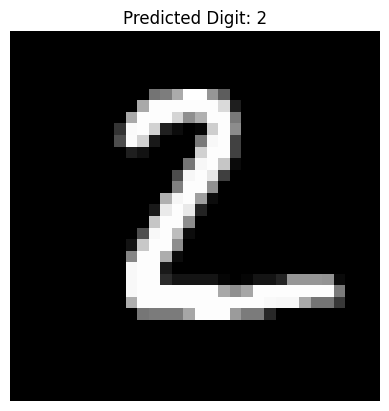

In [37]:
# Forward pass on a single test image
index = 1
x = test_images[index]
y = test_labels[index]
_, probs = lenet5.forward(x, y)
predicted_digit = np.argmax(probs)

plt.imshow(x.squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()


In [27]:
total = len(test_images)
print(total)

10000


In [26]:
import time

start_time = time.time()
x = test_images[0]
y = test_labels[0]
_, probs = lenet5.forward(x, y)
end_time = time.time()

print(f"Time taken for forward pass on one image: {end_time - start_time:.2f} seconds")


Time taken for forward pass on one image: 0.05 seconds
